In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT AND PRE-PROCESS DATA #

In [3]:
df_o = pd.read_csv("../Datasets/moocs23-24.csv")
df_o.head()

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,India,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,United States,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,United States,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,Australia,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32


In [4]:
len(df_o)

416921

In [5]:
df_o.columns

Index(['Id', 'institute', 'course_id', 'year', 'semester', 'userid_DI',
       'viewed', 'explored', 'certified', 'final_cc_cname_DI', 'LoE_DI',
       'gender', 'grade', 'start_time_DI', 'last_event_DI', 'nevents',
       'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts',
       'incomplete_flag', 'age'],
      dtype='object')

In [6]:
df = df_o.copy()

## Check columns for n/a values ##

In [7]:
df.isna().sum()

Id                       0
institute                0
course_id                0
year                     0
semester                 0
userid_DI                0
viewed                   0
explored                 0
certified                0
final_cc_cname_DI        0
LoE_DI                   0
gender               23211
grade                    0
start_time_DI            0
last_event_DI            0
nevents                  0
ndays_act                0
nplay_video              0
nchapters                0
nforum_posts             0
incomplete_flag          0
age                      0
dtype: int64

In [8]:
print("Percentage of entries that lack gender information: ",format(23211/len(df_o)*100, ".2f"), "%")

Percentage of entries that lack gender information:  5.57 %


Because gender is one key feature of this dataset and because it is the only aspect of the dataset that appears to be missing, it makes sense to remove the rows with missing values in order to reduce the amount of "noise" in the data itself.

In [9]:
# Isolate indices of rows with blank values
df[df["gender"].isna()].index

Int64Index([    13,     14,     15,     88,    132,    174,    175,    176,
               177,    404,
            ...
            416725, 416765, 416779, 416786, 416797, 416809, 416814, 416821,
            416822, 416866],
           dtype='int64', length=23211)

In [10]:
# Drop rows
df = df.drop(df[df["gender"].isna()].index)

In [11]:
df.reset_index()

,index,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393705,416916,583001,MITx,6.002x,2024,Spring,MHxPC130030805,1,0,0,...,0.0,9/7/2024,9/7/2024,29,1,197757,1,0,0,24
393706,416917,583002,MITx,6.00x,2024,Spring,MHxPC130184108,1,0,0,...,0.0,9/7/2024,9/7/2024,97,1,4,2,0,0,22
393707,416918,583003,MITx,6.00x,2024,Spring,MHxPC130359782,0,0,0,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,22
393708,416919,583004,MITx,6.002x,2024,Spring,MHxPC130098513,0,0,0,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,34


In [12]:
len(df)

393710

In [13]:
len(set(df["Id"]))

393487

In [14]:
duplicated_entries = df[df.duplicated(subset=["Id"])]
duplicated_entries

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
786,2022,HarvardX,ER22x,2024,Spring,MHxPC130012400,1,0,0,United States,...,0.0,1/8/2024,3/28/2024,13,3,197757,1,0,0,26
787,2023,HarvardX,PH207x,2023,Fall,MHxPC130012400,1,0,0,United States,...,0.0,7/24/2023,3/16/2024,25,9,1,1,0,0,25
7493,20224,HarvardX,PH207x,2023,Fall,MHxPC130014792,0,0,0,United States,...,0.0,8/12/2023,8/12/2023,4,1,197757,0,0,0,27
7494,20226,HarvardX,CB22x,2024,Spring,MHxPC130262508,1,0,0,Philippines,...,0.0,12/21/2023,4/22/2024,14,1,197757,3,0,0,23
7497,20235,HarvardX,PH207x,2023,Fall,MHxPC130443317,0,0,0,United States,...,0.0,8/12/2023,8/14/2023,3,2,197757,0,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408066,572023,MITx,8.MReV,2024,Summer,MHxPC130106847,0,0,0,India,...,0.0,8/6/2024,8/6/2024,2,1,197757,0,0,0,25
408067,572024,MITx,6.00x,2024,Spring,MHxPC130450735,1,0,0,Russian Federation,...,0.0,8/3/2024,9/6/2024,740,11,86,4,0,0,31
416180,582022,MITx,6.00x,2024,Spring,MHxPC130551092,0,0,0,United States,...,0.0,9/3/2024,9/3/2024,1,1,197757,0,0,0,20
416181,582023,MITx,6.00x,2024,Spring,MHxPC130130490,0,0,0,Other Africa,...,0.0,9/3/2024,9/3/2024,2,1,197757,0,0,0,30


In [15]:
# for student_id in duplicated_entries["Id"]:
#     print(df[df["Id"]==student_id])

In [16]:
len(set(duplicated_entries["Id"]))

223

In [17]:
set(df["LoE_DI"])

{"Bachelor's", 'Doctorate', 'Less than Secondary', "Master's", 'Secondary'}

In [18]:
set(df["final_cc_cname_DI"])

{'Australia',
 'Bangladesh',
 'Brazil',
 'Canada',
 'China',
 'Colombia',
 'Egypt',
 'France',
 'Germany',
 'Greece',
 'India',
 'Indonesia',
 'Japan',
 'Mexico',
 'Morocco',
 'Nigeria',
 'Other Africa',
 'Other East Asia',
 'Other Europe',
 'Other Middle East/Central Asia',
 'Other North & Central Amer., Caribbean',
 'Other Oceania',
 'Other South America',
 'Other South Asia',
 'Pakistan',
 'Philippines',
 'Poland',
 'Portugal',
 'Russian Federation',
 'Spain',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Unknown/Other'}

<AxesSubplot:xlabel='explored', ylabel='Count'>

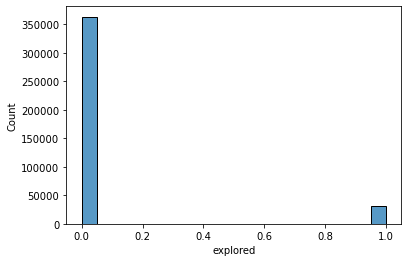

In [19]:
sns.histplot(df["explored"])

In [20]:
df = df.drop(["year", "semester", "start_time_DI", "last_event_DI","viewed","grade","start_time_DI","explored","last_event_DI","nevents","ndays_act","nplay_video", "nchapters", "nforum_posts","incomplete_flag"], axis=1)

In [21]:
df

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,gender,age
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,m,23
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,m,19
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,m,24
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,m,20
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,f,32
...,...,...,...,...,...,...,...,...,...
416916,583001,MITx,6.002x,MHxPC130030805,0,Pakistan,Master's,m,24
416917,583002,MITx,6.00x,MHxPC130184108,0,Canada,Bachelor's,m,22
416918,583003,MITx,6.00x,MHxPC130359782,0,Other Europe,Bachelor's,f,22
416919,583004,MITx,6.002x,MHxPC130098513,0,United States,Doctorate,m,34


In [22]:
# https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/

df["gender_numerical"] = df["gender"].apply(lambda x: 1 if x=='m' else 0)

In [23]:
df = df.drop(["gender"], axis=1)

In [24]:
df

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0
...,...,...,...,...,...,...,...,...,...
416916,583001,MITx,6.002x,MHxPC130030805,0,Pakistan,Master's,24,1
416917,583002,MITx,6.00x,MHxPC130184108,0,Canada,Bachelor's,22,1
416918,583003,MITx,6.00x,MHxPC130359782,0,Other Europe,Bachelor's,22,0
416919,583004,MITx,6.002x,MHxPC130098513,0,United States,Doctorate,34,1


# REDUCE DATASET #

In [25]:
from sklearn.model_selection import train_test_split
# large_df, small_df = train_test_split(df, test_size=0.3, random_state=7,stratify=df["certified"])

In [26]:
# len(large_df)

In [27]:
# len(small_df)

# GOWER DISTANCES #

In [28]:
# https://towardsdatascience.com/gowers-distance-for-mixed-categorical-and-numerical-data-799fedd1080c/#:~:text=Gower%20distance%20calculates%20a%20score,the%20equation%20is%20very%20simple.
# https://medium.com/data-science/gowers-distance-for-mixed-categorical-and-numerical-data-799fedd1080c
# https://rajithkalinda.medium.com/understanding-gower-distance-for-mixed-data-types-in-machine-learning-e90ad42d5684

In [29]:
import gower

In [30]:
# gower_data = gower.gower_matrix(np.asarray(small_df[["final_cc_cname_DI", "LoE_DI", "gender_numerical", "age"]]), cat_features=[1,1,0,0])

In [ ]:
gower_data = gower.gower_matrix(np.asarray(df[["final_cc_cname_DI", "LoE_DI", "age", "gender_numerical"]]), cat_features=[1,1,0,0])

In [ ]:
#23:24